## Projeto 2

Para o Projeto 2 o objetivo é responder 10 perguntas de negócio a partir de um dataset sobre uma rede de varejo que comercializa diversos produtos em diversas cidades dos EUA.

Os dados são reais e foram extraídos do link:

https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxlsFizemos


### Pacotes

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Leitura dos dados

In [209]:
df_dados = pd.read_csv('C:/Users/prisc/Downloads/dataset.csv')

### Analise exploratória dos dados

In [16]:
# Nome das colunas
print(df_dados.columns)

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')


In [17]:
# Verificar o tipo de dado de cada coluna
df_dados.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [102]:
df_dados.head(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.96
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.94
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.62


In [194]:
print("Formato dados:", df_dados.shape)

Formato dados: (9700, 11)


In [210]:
# Convertendo a coluna 'data_objeto' para o tipo de data dd/mm/yyyy
df_dados['Data_Pedido'] = pd.to_datetime(df_dados['Data_Pedido'], format='%d/%m/%Y')

df_dados.dtypes

ID_Pedido               object
Data_Pedido     datetime64[ns]
ID_Cliente              object
Segmento                object
Pais                    object
Cidade                  object
Estado                  object
ID_Produto              object
Categoria               object
SubCategoria            object
Valor_Venda            float64
dtype: object

In [207]:
print(df_dados['Data_Pedido'][0])

2017-11-08


In [19]:
# Verificando se há registros duplicados
df_dados[df_dados.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [20]:
# Verificando de há valores ausentes
df_dados.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

In [23]:
# Amostra da tabela
df_dados.sample(3)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
1561,CA-2018-107293,05/09/2018,CS-12400,Home Office,United States,Seattle,Washington,OFF-AR-10003732,Office Supplies,Art,2.780
2661,CA-2018-123372,28/11/2018,DG-13300,Corporate,United States,New York City,New York,OFF-EN-10003055,Office Supplies,Envelopes,79.960
8769,CA-2018-115882,14/09/2018,DB-13555,Corporate,United States,Raleigh,North Carolina,OFF-PA-10001125,Office Supplies,Paper,74.352


### Perguntas de negócio:

1) Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [42]:
# Ordenando os dados de Office Supplies por maior valor de venda
df_dados[df_dados['Categoria'] == 'Office Supplies'] \
        .sort_values(by='Valor_Venda', ascending=False)\
        [['Pais', 'Cidade','Estado', 'Valor_Venda']].head()

,Pais,Cidade,Estado,Valor_Venda
9036,United States,Detroit,Michigan,9892.74
4095,United States,Minneapolis,Minnesota,9449.95
2505,United States,San Francisco,California,8187.65
509,United States,Atlanta,Georgia,6354.95
6517,United States,Jackson,Michigan,5443.96


A Cidade com maior valor de venda para a categoria 'Office Supplies' é a cidade de Michigan com valor de venda de 9892,74.

2) Qual o Total de Vendas Por Data do Pedido? Demonstre o resultado através de um gráfico.

In [231]:
total_venda_por_data = df_dados.groupby('Data_Pedido')['Valor_Venda'].sum()

total_venda_por_data.to_frame().sort_values(by='Valor_Venda')

,Valor_Venda
Data_Pedido,
2016-07-19,2.025
2018-07-12,3.816
2015-01-28,3.928
2015-06-24,4.272
2015-10-01,4.710
...,...
2015-09-08,14228.428
2018-03-23,14816.068
2018-10-22,15158.877


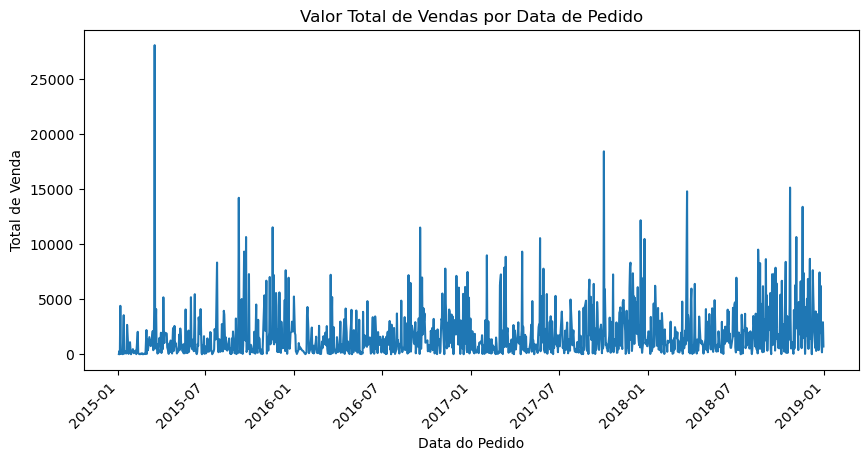

In [232]:
plt.figure(figsize=(10, 5))  

total_venda_por_data.plot(x = 'Data_Pedido', y = 'Valor_Venda')

# Rotacionar eixo
plt.xticks(rotation=45)

# Adicionar rótulos e título
plt.xlabel('Data do Pedido')
plt.ylabel('Total de Venda')
plt.title('Valor Total de Vendas por Data de Pedido')


plt.show();


3) Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.

4. Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.

5. Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza

6. Qual o Total de Vendas Por Segmento e Por Ano?


7. Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:
- Se o Valor_Venda for maior que 1000 recebe 15% de desconto.
- Se o Valor_Venda for menor que 1000 recebe 10% de desconto.

- Quantas Vendas Receberiam 15% de Desconto?

8. Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

9. Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.

10. Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias? Demonstre tudo através de um único gráfico